In [3]:
from pyadjoint.utils.cctm import *
import pyadjoint
import obspy
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# read the waveform data
dat = obspy.read('../example_data/TA.A38.BXZ.sac.obs')[0]
syn = obspy.read('../example_data/TA.A38.BXZ.sac.syn')[0]

# filter
band = [5, 50]
dat.filter('bandpass', freqmin=1/band[1], freqmax=1/band[0], corners=2, zerophase=True)
syn.filter('bandpass', freqmin=1/band[1], freqmax=1/band[0], corners=2, zerophase=True)

time_win = np.array([42.844449, 91.120007]) - syn.stats.sac.b

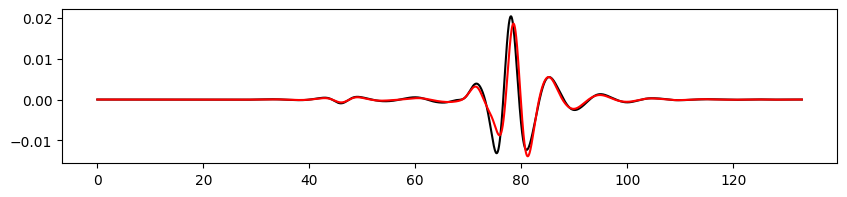

In [5]:
plt.figure(figsize=(10, 2))
plt.plot(dat.times(), dat.data, label='Observed', color='black')
plt.plot(syn.times(), syn.data, label='Synthetic', color='red')

In [6]:

# tshift, dlna, sigma_dt, sigma_dlna = calculate_cc_shift(dat_cp.data, syn_cp.data, dat_cp.stats.delta, dt_sigma_min=1.0, dlna_sigma_min=0.5)
config = pyadjoint.get_config(adjsrc_type="multitaper",
                              min_period=5., max_period=50.,
                              taper_percentage=0.3, taper_type="hann", measure_type="dt")
adj_tt = pyadjoint.calculate_adjoint_source(config=config,
                                             observed=dat, synthetic=syn,
                                             windows=[time_win]
                                             )
config = pyadjoint.get_config(adjsrc_type="multitaper",
                              min_period=5., max_period=50.,
                              taper_percentage=0.3, taper_type="hann", measure_type="am")
adj_am = pyadjoint.calculate_adjoint_source(config=config,
                                             observed=dat, synthetic=syn,
                                             windows=[time_win]
                                             )
print(config.lnpt)



15


In [7]:
! ../bin/xex_cc_misfit ../example_data/TA.A38.BXZ.sac.obs ../example_data/TA.A38.BXZ.sac.syn 5 50 42.844449 91.120007 13 ./
! ../bin/xex_cc_misfit ../example_data/TA.A38.BXZ.sac.obs ../example_data/TA.A38.BXZ.sac.syn 5 50 42.844449 91.120007 14 ./
# !../bin/xex_cc_misfit ../example_data/TA.A38.BXZ.sac.obs ../example_data/TA.A38.BXZ.sac.syn 5 50 42.844449 91.120007 11 ./

 Using multitaper cross-correlation measurement
Multitaper time shift (s): -0.35000+/- 1.00000
Multitaper time shift misfit:  0.02061
 Using multitaper cross-correlation measurement
Multitaper amplitude anomaly (ln):  0.11057+/- 0.50000
Multitaper amplitude anomaly misfit:  0.03059


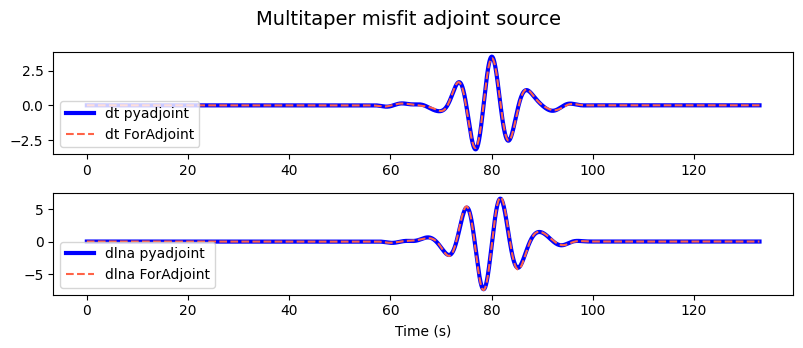

In [8]:
fpf = obspy.read('./TA.A38.BXZ.mtdt.sac')[0]
fqf = obspy.read('./TA.A38.BXZ.mtdlna.sac')[0]
plt.figure(figsize=(8, 3.5))
plt.subplot(211)
plt.plot(syn.times(), adj_tt.adjoint_source[::-1], label='dt pyadjoint', color='blue', lw=3)
plt.plot(fpf.times(), fpf.data, label='dt ForAdjoint', color='tomato', linestyle='--', lw=1.5)
plt.legend(loc='lower left')
plt.subplot(212)
plt.plot(syn.times(), adj_am.adjoint_source[::-1], label='dlna pyadjoint', color='blue', lw=3)
plt.plot(fqf.times(), fqf.data, label='dlna ForAdjoint', color='tomato', linestyle='--', lw=1.5)
plt.legend(loc='lower left')
plt.xlabel('Time (s)')
plt.suptitle('Multitaper misfit adjoint source', fontsize=14)
plt.tight_layout()
